In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
warnings.filterwarnings('ignore')

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [6]:
df.region.unique()

array([3, 2, 1, 0])

In [7]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

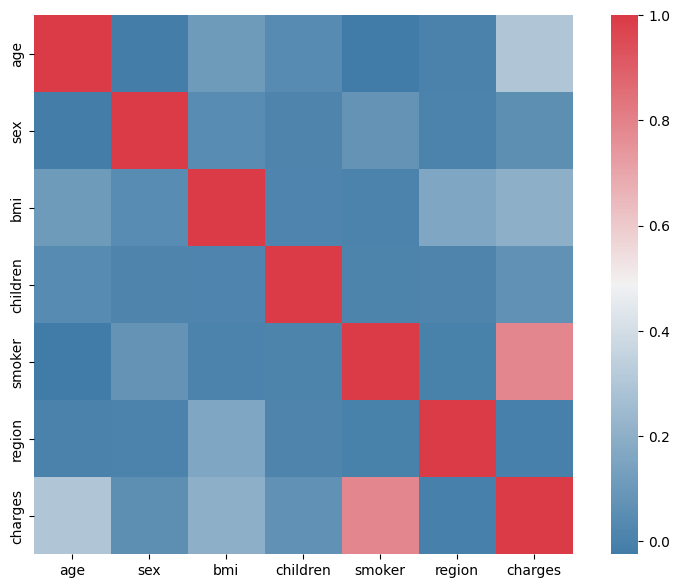

In [8]:
import seaborn as sn
f, ax = plt.subplots(figsize = (10, 7))
corr = df.corr()
sn.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sn.diverging_palette(240, 10, as_cmap = True), square = True, ax = ax)

Text(0.5, 1.0, 'Distribution of charges for no-smokers')

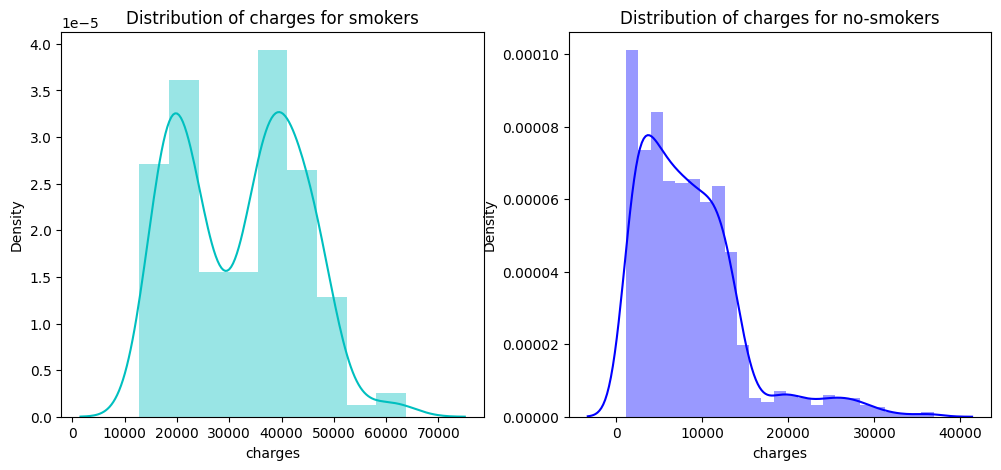

In [9]:
f = plt.figure(figsize = (12, 5))

ax = f.add_subplot(121)
sn.distplot(df[(df.smoker == 1)]["charges"], color = 'c', ax = ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sn.distplot(df[(df.smoker == 0)]['charges'], color = 'b', ax = ax)
ax.set_title('Distribution of charges for no-smokers')

# We can notice the trend, that smokers spent more on treatment

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Here women are coded as 1 and men as 0, We can notice that number of smoking mens are bigger than women smokers

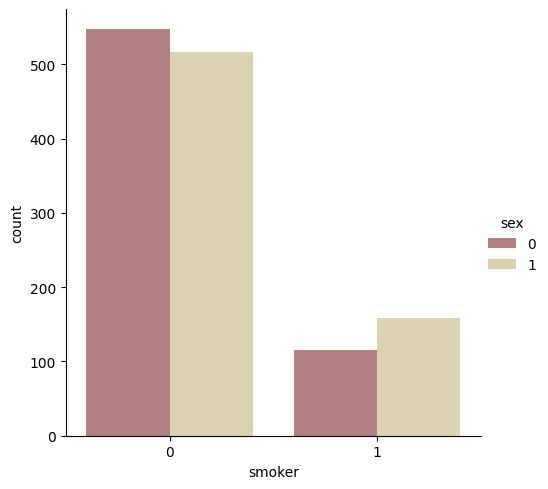

In [11]:
sn.catplot(x = "smoker", kind = "count", hue =  'sex', palette = "pink", data = df)

# We can see that women's non-smokers spend just a bit more than 10 000, when smoker womens spent a bit more than 40 000

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

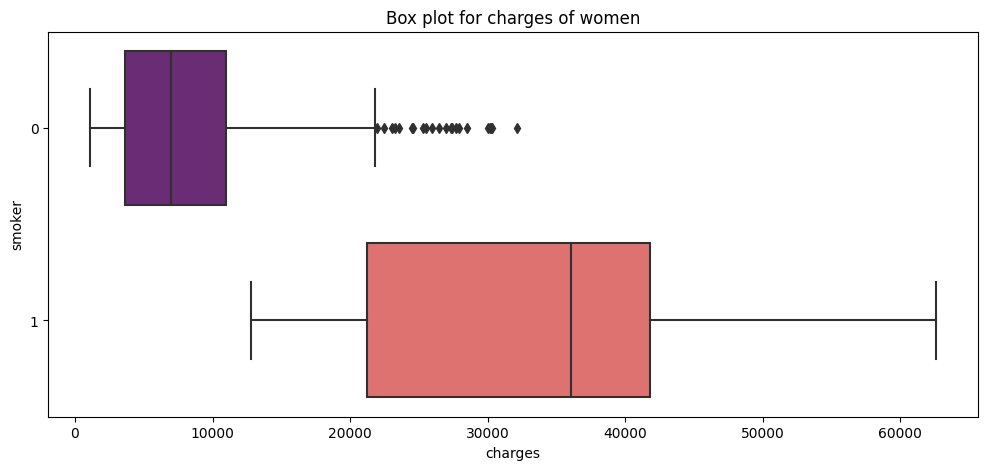

In [12]:
plt.figure(figsize = (12, 5))
plt.title("Box plot for charges of women")
sn.boxplot(y = "smoker", x = "charges", data = df[(df.sex == 1)], orient = 'h', palette = "magma")

# In men's case the trend is similar

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

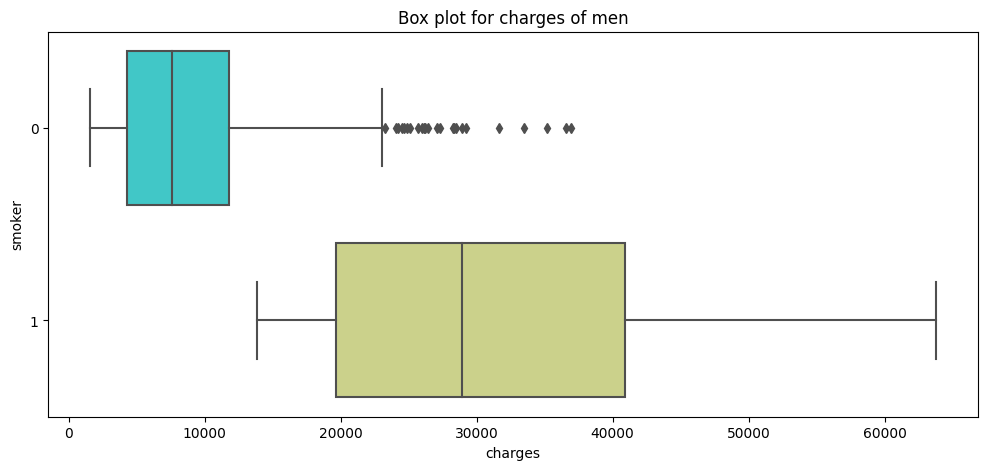

In [13]:
plt.figure(figsize = (12, 5))
plt.title("Box plot for charges of men")
sn.boxplot(y = "smoker", x = "charges", data = df[(df.sex == 0)], orient = 'h', palette = 'rainbow')

# What's interesting to notice is that we have patients under 20 years old, most of patients are in age around 20 and the maximum age is between 60 and 70

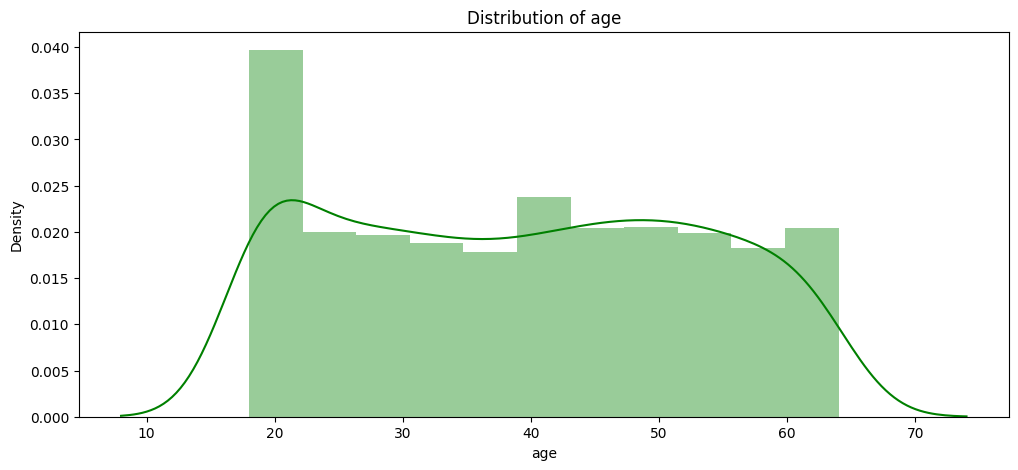

In [14]:
plt.figure(figsize = (12, 5))
plt.title('Distribution of age')
ax = sn.distplot(df["age"], color = 'green')

# Number of smokers under 20 is actually big and we see this same trend as previous

Text(0.5, 1.0, 'The number  of smokers and non_smokers (18 years old)')

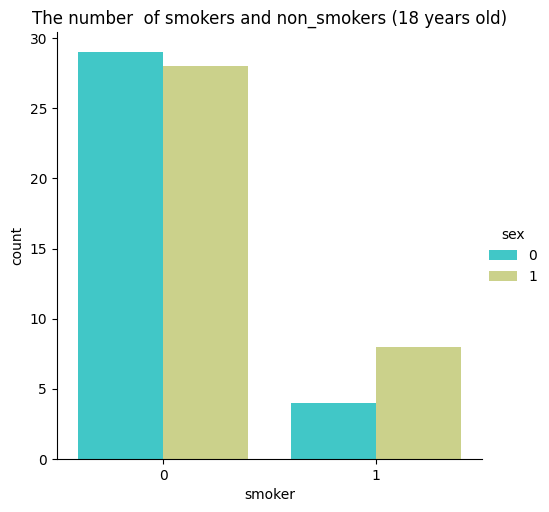

In [15]:
sn.catplot(x = 'smoker', kind = 'count', hue = 'sex', palette = 'rainbow', data = df[(df.age == 18)])
plt.title('The number  of smokers and non_smokers (18 years old)')

# 18 years non-smokers spent very little for treatment, Now what's very interesting 18 years old smokers spent only just a little less than older persons

<Axes: title={'center': 'Box plot for charges of 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

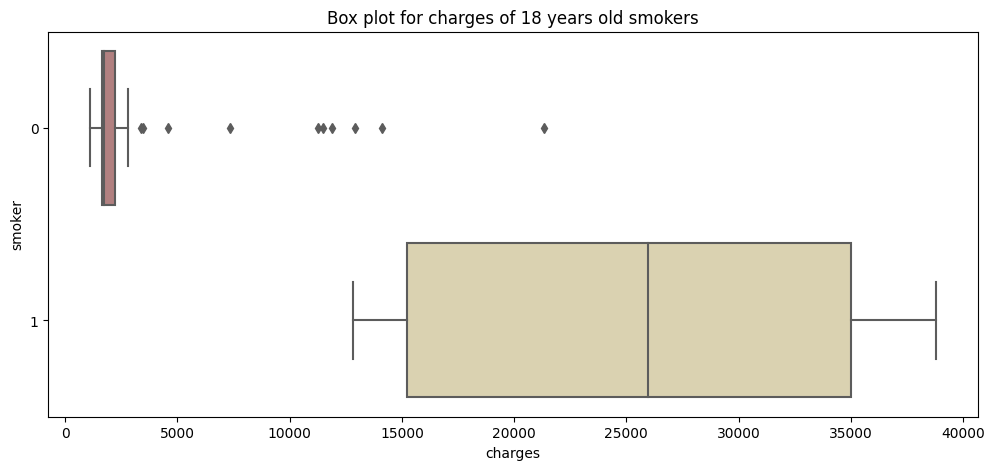

In [16]:
plt.figure(figsize = (12, 5))
plt.title("Box plot for charges of 18 years old smokers")
sn.boxplot(y = "smoker", x = "charges", data = df[(df.age == 18)], orient = 'h', palette = 'pink')

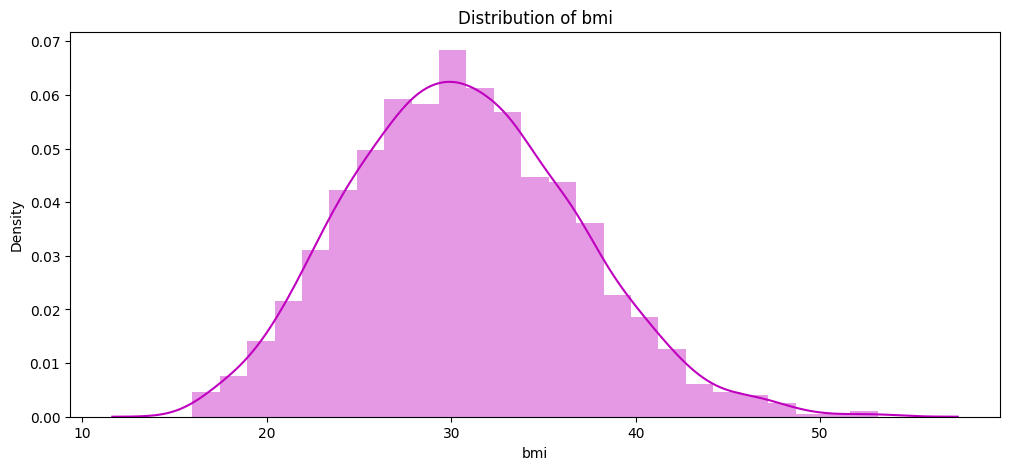

In [17]:
plt.figure(figsize = (12, 5))
plt.title("Distribution of bmi")
ax = sn.distplot(df["bmi"], color = 'm')

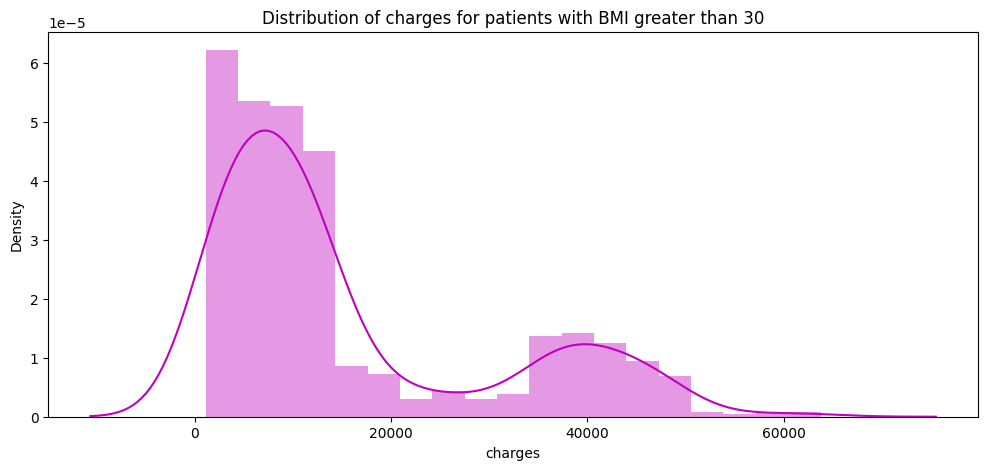

In [18]:
plt.figure(figsize = (12, 5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sn.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

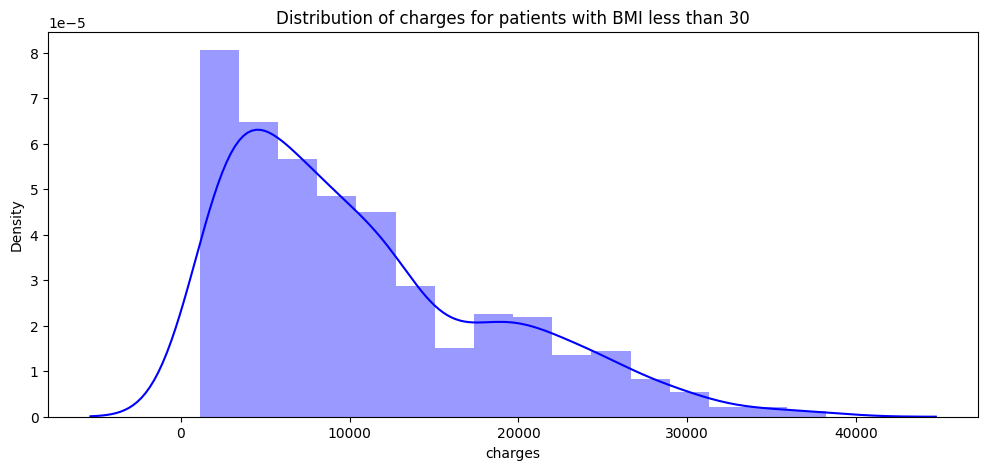

In [19]:
plt.figure(figsize = (12, 5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sn.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

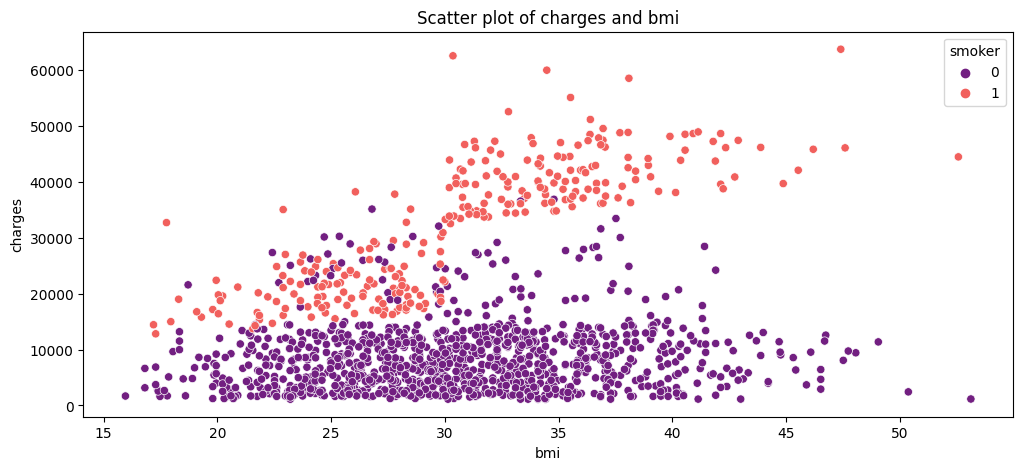

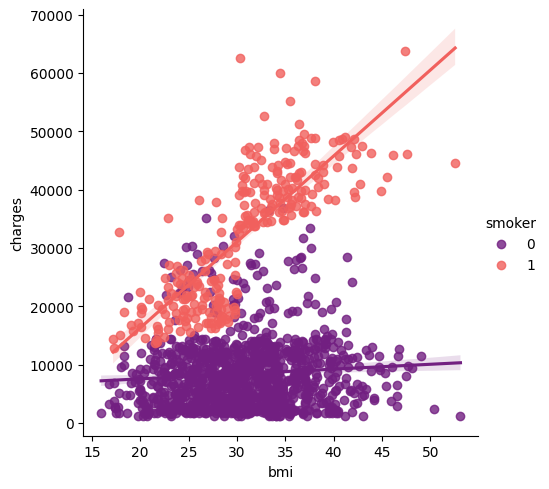

In [20]:
plt.figure(figsize = (12, 5))
ax = sn.scatterplot(x = 'bmi', y = 'charges', data = df, palette = 'magma', hue = 'smoker')
ax.set_title('Scatter plot of charges and bmi')

sn.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df, palette = 'magma')

# It seems that most of the patients do no't have children or have 1 or 2

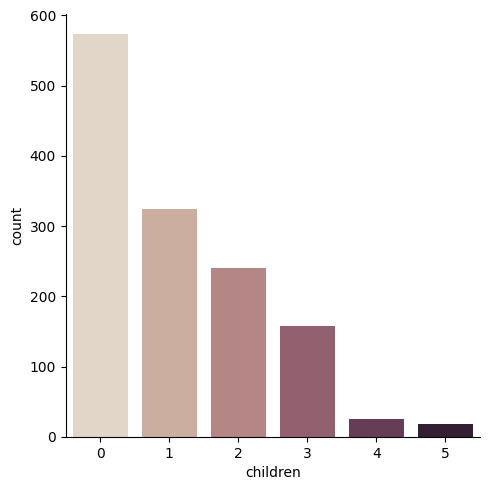

In [21]:
sn.catplot(x = 'children', kind = 'count', palette = 'ch:.25', data = df)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

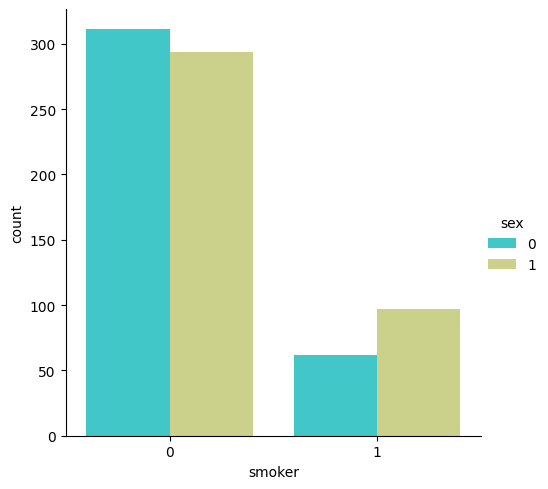

In [22]:
sn.catplot(x = 'smoker', kind = 'count', palette = 'rainbow', hue = 'sex', data = df[(df.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['charges'], axis = 1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7998747145449959


In [25]:
y_train_pred = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
X = df.drop(['charges', 'region'], axis = 1)
y = df.charges

quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size = 0.2, random_state = 0)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
print(poly_reg.score(X_test, y_test))

0.8808682351226942


In [29]:
Y_train_pred = poly_reg.predict(X_train)
Y_test_pred = poly_reg.predict(X_test)

In [31]:
print('MSE train data: %.3f, MSE test data: %.3f' % (mean_squared_error(y_train, Y_train_pred),
                                                     mean_squared_error(y_test, Y_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_score(y_train, Y_train_pred),
                                                   r2_score(y_test, Y_test_pred)))

MSE train data: 23934397.058, MSE test data: 18957433.256
R2 train data: 0.833, R2 test data: 0.881


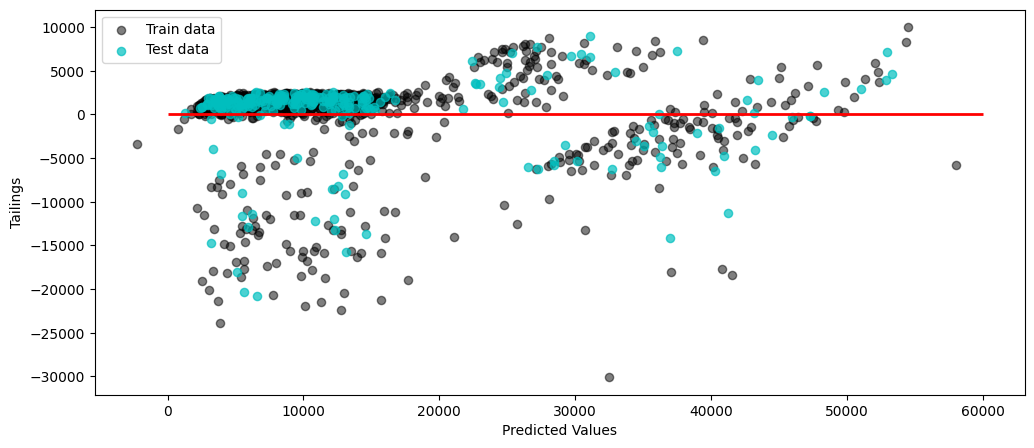

In [35]:
plt.figure(figsize = (12, 5))

plt.scatter(Y_train_pred, Y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(Y_test_pred, Y_test_pred - y_test, c = 'c', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()